In [135]:
#load libraries
import pandas as pd
import numpy as np
import seaborn as sns


In [3]:
#read Data
conductor=pd.read_csv("train.csv")
elements=pd.read_csv("unique_m.csv")


In [24]:
# Merge based on index
data = pd.concat([ elements.iloc[:,:-2],conductor], axis=1)


In [25]:
# Look at the data
data.head()


H  He   Li   Be    B    C    N    O    F  Ne  ...  wtd_mean_Valence  \
0  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...          2.257143   
1  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...          2.257143   
2  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...          2.271429   
3  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...          2.264286   
4  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...          2.242857   

   gmean_Valence  wtd_gmean_Valence  entropy_Valence  wtd_entropy_Valence  \
0       2.213364           2.219783         1.368922             1.066221   
1       1.888175           2.210679         1.557113             1.047221   
2       2.213364           2.232679         1.368922             1.029175   
3       2.213364           2.226222         1.368922             1.048834   
4       2.213364           2.206963         1.368922             1.096052   

   range_Valence  wtd_range_Valence  std_Valence  wtd_std_Valence  \
0              1           1.085714     0.433013         0.437059   
1              2           1.128571     0.632456         0.468606   
2              1           1.114286     0.433013         0.444697   
3              1           1.100000     0.433013         0.440952   
4              1           1.057143     0.433013         0.428809   

   critical_temp  
0           29.0  
1           26.0  
2           19.0  
3           22.0  
4           23.0  

[5 rows x 168 columns]

### 21,263 records and 167 features + the dependent variable

In [116]:
# Data size
data.shape


(21263, 168)

### The the distribution of the response variabl is right skewed, there seems to be a big outlier

In [69]:
# checking the dependen variable
data["critical_temp"].describe()


count    21263.000000
mean        34.421219
std         34.254362
min          0.000210
25%          5.365000
50%         20.000000
75%         63.000000
max        185.000000
Name: critical_temp, dtype: float64

In [114]:
# top 5 conductors
data['critical_temp'].nlargest(5)


20573    185.0
3985     143.0
5200     143.0
19039    137.4
1341     136.0
Name: critical_temp, dtype: float64

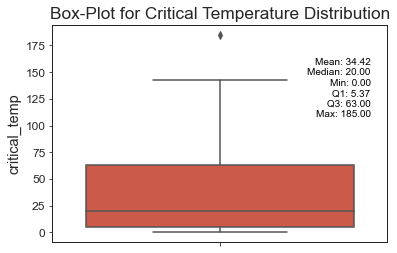

In [97]:
# box plot
ax = sns.boxplot(y=data["critical_temp"])

# Calculate statistics
mean = data["critical_temp"].mean()
median = data["critical_temp"].median()  
minimum = data["critical_temp"].min()
maximum = data["critical_temp"].max()
q1 = data["critical_temp"].quantile(0.25)
q3 = data["critical_temp"].quantile(0.75)

# Annotate the plot with statistics
stats_text = f"Mean: {mean:.2f}\nMedian: {median:.2f}\nMin: {minimum:.2f}\nQ1: {q1:.2f}\nQ3: {q3:.2f}\nMax: {maximum:.2f}"
plt.gca().text(0.95, 0.85, stats_text, transform=plt.gca().transAxes,
               fontsize=10, va='top', ha='right', color='black', bbox=dict(facecolor='white', alpha=0.5))

# Add title to the plot
plt.title("Box-Plot for Critical Temperature Distribution")

# Show the plot
plt.show()


In [150]:
#There are a lot of 143-135 
data["critical_temp"].nlargest(8)

20573    185.0
3985     143.0
5200     143.0
19039    137.4
1341     136.0
1343     136.0
5476     135.8
7105     135.7
Name: critical_temp, dtype: float64

Text(0.5, 1.0, 'Histogram of the distribution after the third quartile')

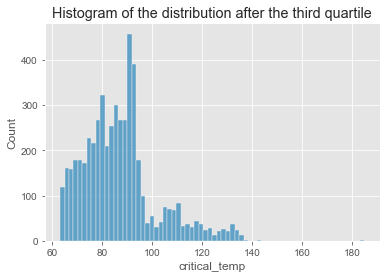

In [152]:
#Checking the distribution after the third quartile
#the count of conductures is less but there still quite a few up to 143
data[data["critical_temp"]>63]["critical_temp"]
sns.histplot(x=data[data["critical_temp"]>63]["critical_temp"])
plt.title("Histogram of the distribution after the third quartile")

##### + As assumed earlier it is mor of a bi-modal distribution one around 0 and another one around 82
+ Would be interested to see if the conductor that reaches 185 for critical temp is correct of it is a mistake. There is only 1 ate 185 and followed a bunch that reach 143 and less. 

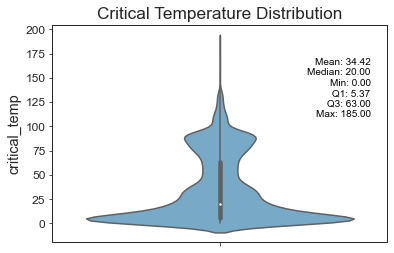

In [95]:
# Create the combined box and violin plot
ax = sns.violinplot(y=data["critical_temp"], inner="box", palette="Blues")

# Calculate statistics
mean = data["critical_temp"].mean()
median = data["critical_temp"].median()  # Median (Q2)
minimum = data["critical_temp"].min()
maximum = data["critical_temp"].max()
q1 = data["critical_temp"].quantile(0.25)
q3 = data["critical_temp"].quantile(0.75)

# Annotate the plot with statistics
stats_text = f"Mean: {mean:.2f}\nMedian: {median:.2f}\nMin: {minimum:.2f}\nQ1: {q1:.2f}\nQ3: {q3:.2f}\nMax: {maximum:.2f}"
plt.gca().text(0.95, 0.85, stats_text, transform=plt.gca().transAxes,
               fontsize=10, va='top', ha='right', color='black', bbox=dict(facecolor='white', alpha=0.5))

# Add title to the plot
plt.title("Critical Temperature Distribution")

# Show the plot
plt.show()


# EDA

# --> write right skewed/ left skewed and on the distributions

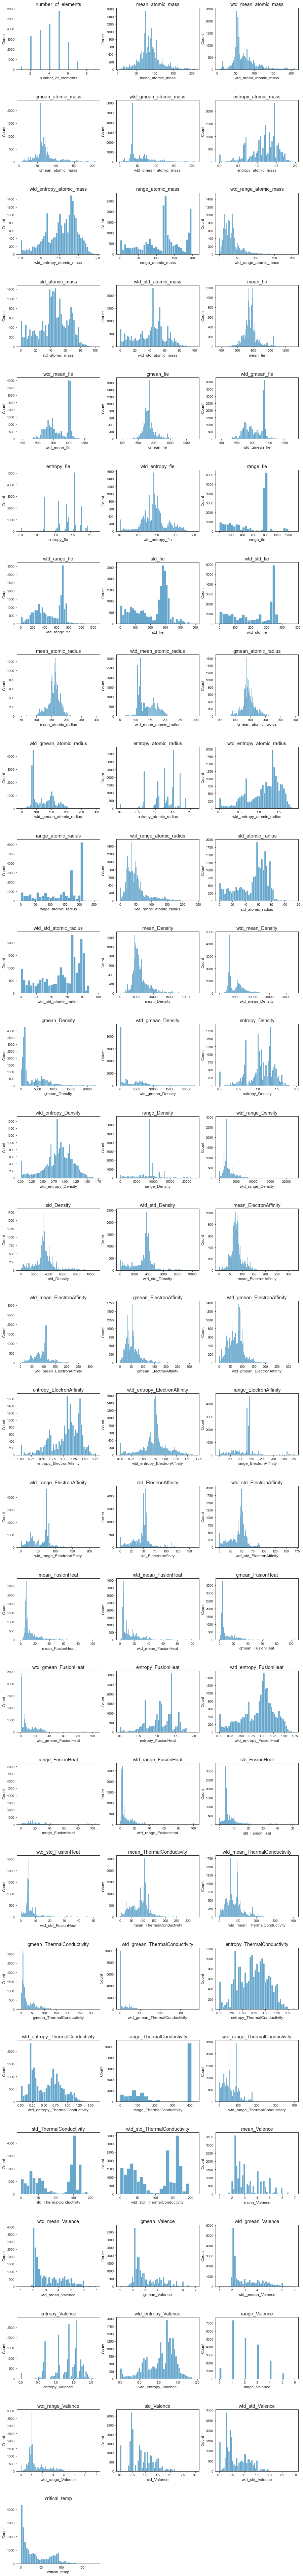

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Assuming conductor is your DataFrame
num_columns = len(conductor.columns)
num_rows = math.ceil(num_columns / num_plots_per_row)

plt.figure(figsize=(15, 5 * num_rows))  # Adjust the figure size here

# Set the style to white background
# sns.set_style("whitegrid")
sns.set_style("ticks")
for idx, col in enumerate(conductor.columns, start=1):
    plt.subplot(num_rows, num_plots_per_row, idx)
    sns.histplot(data=conductor[col], kde=False)
    plt.title(col)
plt.subplots_adjust(hspace=0.5)
# plt.tight_layout()
plt.show()


# --> create Facet wrap based on the similar a attribute to see patterns
# find a plot to show correlation that is not clutter

<AxesSubplot:>

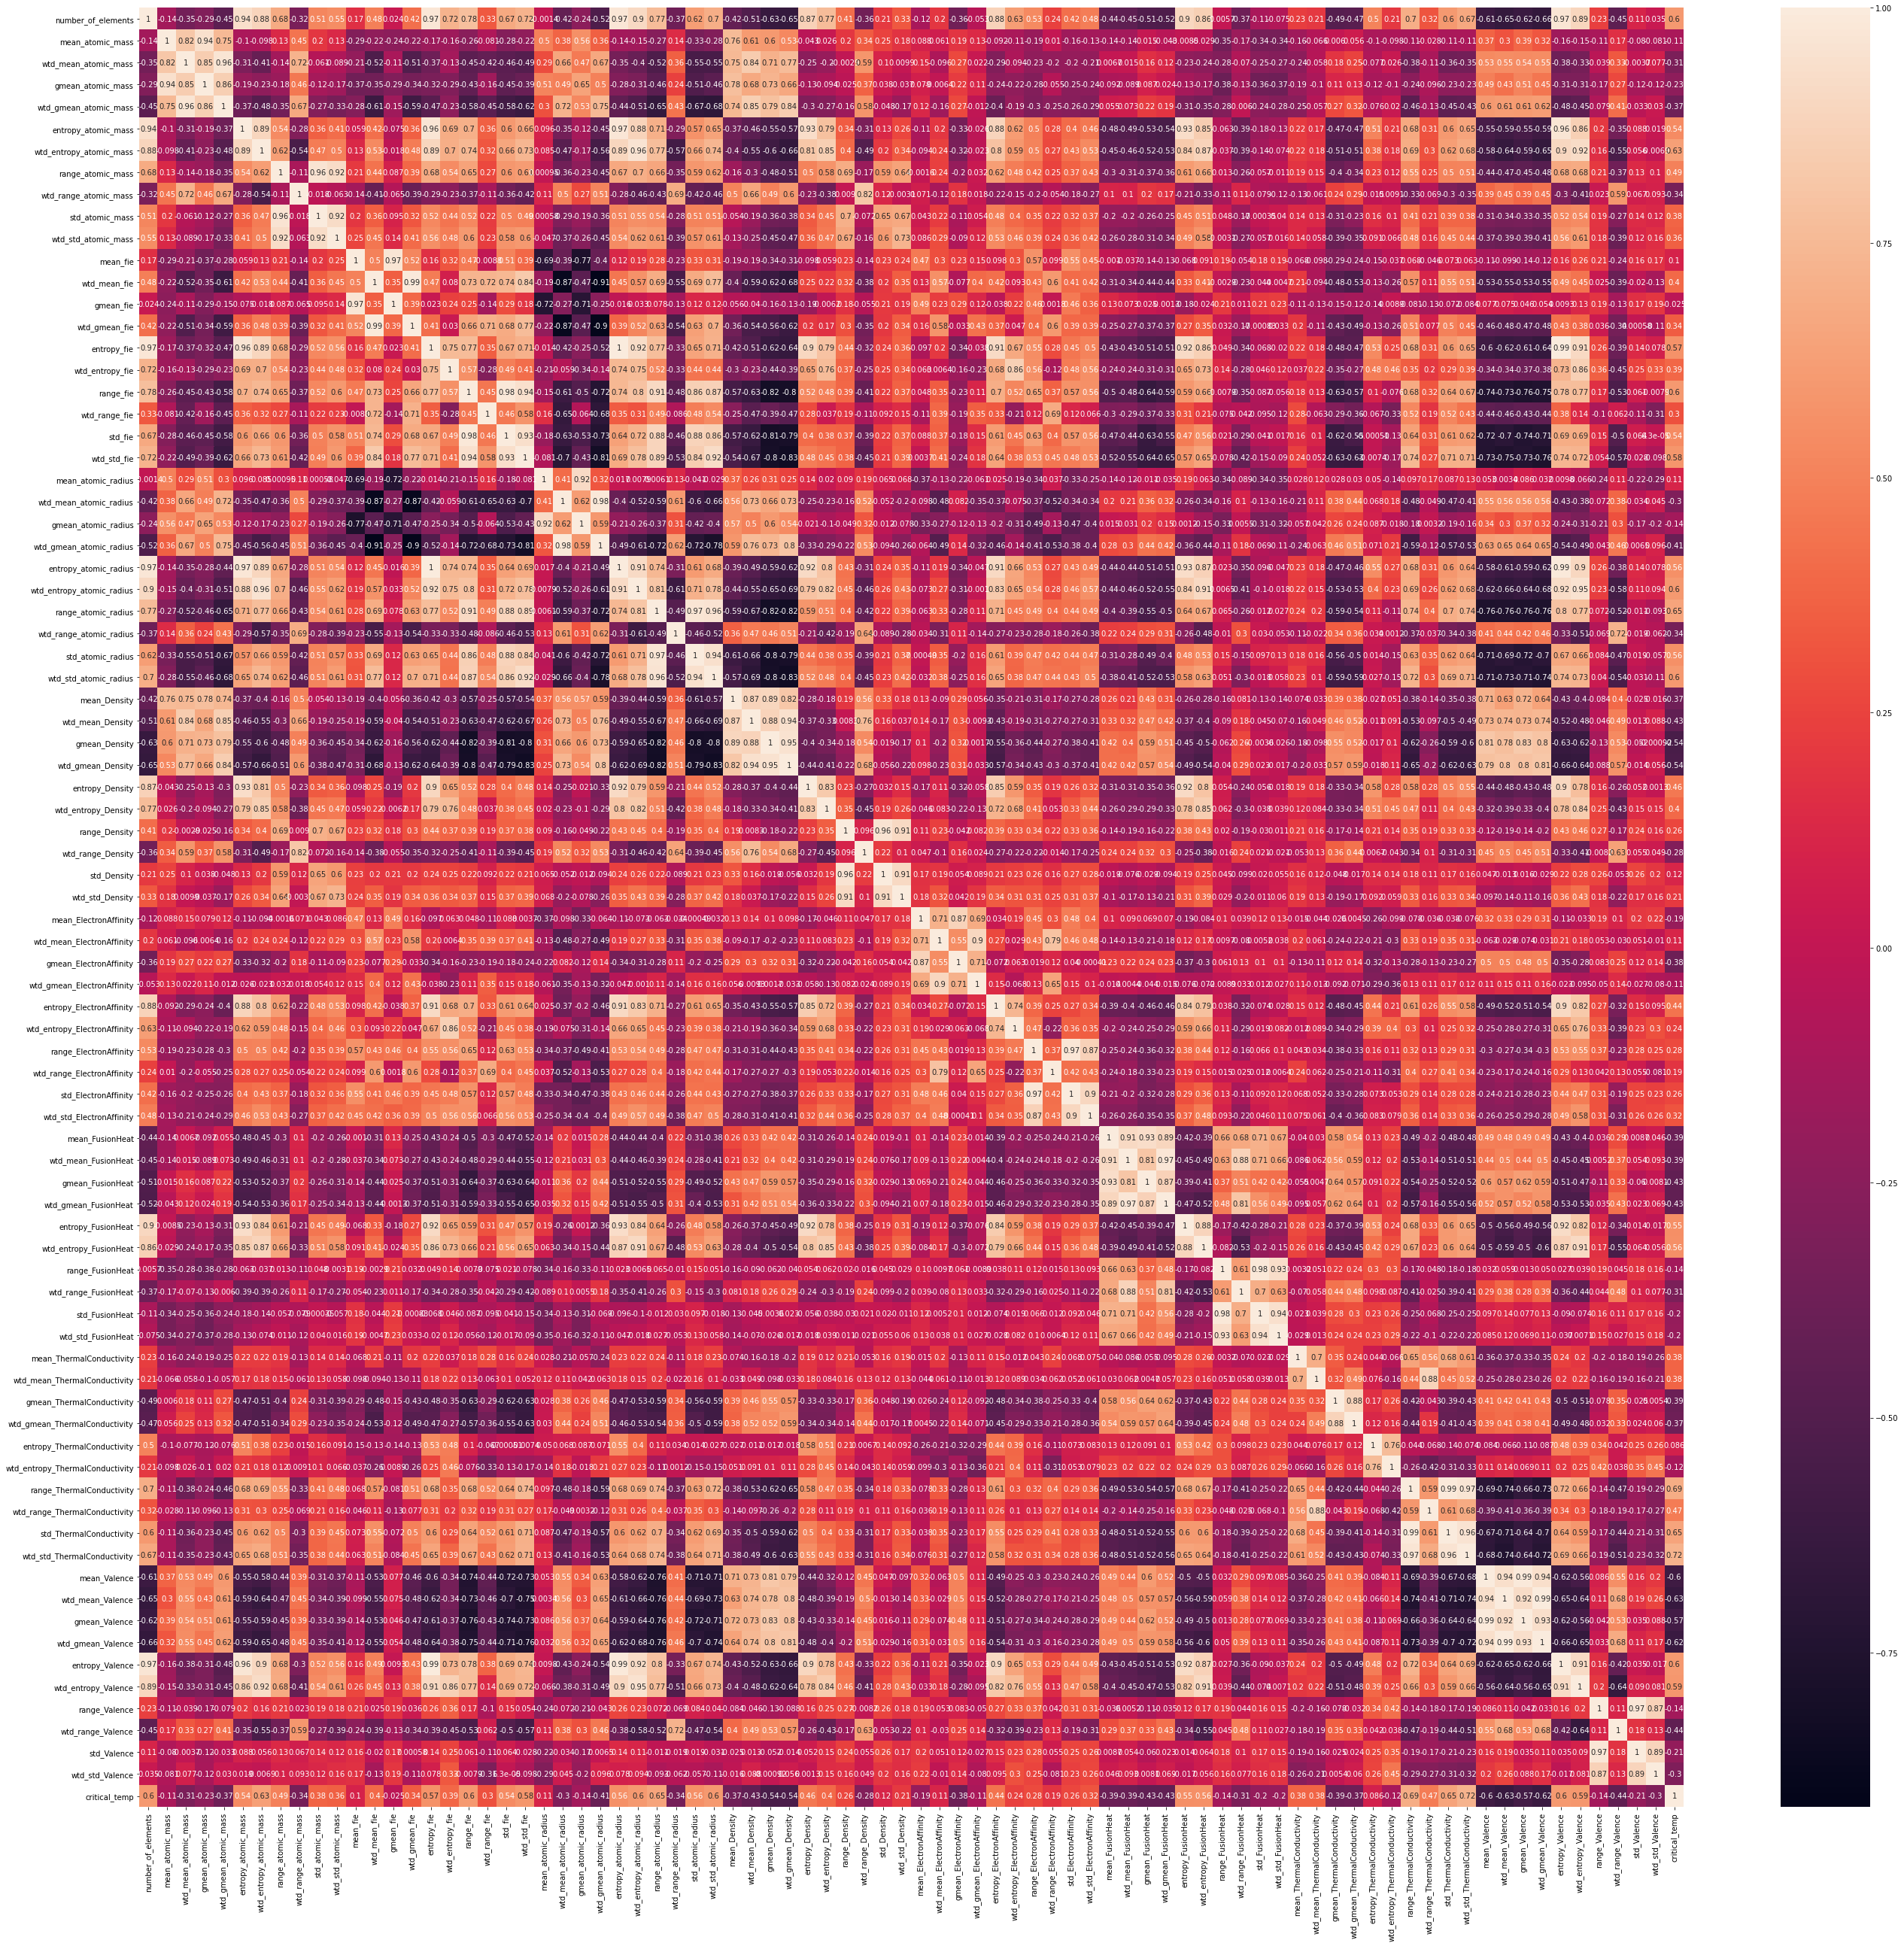

In [46]:
# Correlation
import matplotlib.pyplot as plt
plt.figure(figsize=(46,44))
sns.heatmap(conductor.corr(), annot=True)


+ All numeric data

In [57]:
#All data is numeric
data.dtypes.unique()


array([dtype('float64'), dtype('int64')], dtype=object)

# Model

+ Set x and y
+ Standarize all the variables that are no the elements since the elements are dummies

In [196]:
data.iloc[:,:-1].iloc[:,86:]

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                       4         88.944468             57.862692   
1                       5         92.729214             58.518416   
2                       4         88.944468             57.885242   
3                       4         88.944468             57.873967   
4                       4         88.944468             57.840143   
...                   ...               ...                   ...   
21258                   4        106.957877             53.095769   
21259                   5         92.266740             49.021367   
21260                   2         99.663190             95.609104   
21261                   2         99.663190             97.095602   
21262                   3         87.468333             86.858500   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0              66.361592              36.116612             1.181795   
1              73.132787              36.396602             1.449309   
2              66.361592              36.122509             1.181795   
3              66.361592              36.119560             1.181795   
4              66.361592              36.110716             1.181795   
...                  ...                    ...                  ...   
21258          82.515384              43.135565             1.177145   
21259          64.812662              32.867748             1.323287   
21260          99.433882              95.464320             0.690847   
21261          99.433882              96.901083             0.690847   
21262          82.555758              80.458722             1.041270   

       wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                     1.062396          122.90607              31.794921   
1                     1.057755          122.90607              36.161939   
2                     0.975980          122.90607              35.741099   
3                     1.022291          122.90607              33.768010   
4                     1.129224          122.90607              27.848743   
...                        ...                ...                    ...   
21258                 1.254119          146.88130              15.504479   
21259                 1.571630          188.38390               7.353333   
21260                 0.530198           13.51362              53.041104   
21261                 0.640883           13.51362              31.115202   
21262                 0.895229           71.75500              43.144000   

       std_atomic_mass  ...  mean_Valence  wtd_mean_Valence  gmean_Valence  \
0            51.968828  ...          2.25          2.257143       2.213364   
1            47.094633  ...          2.00          2.257143       1.888175   
2            51.968828  ...          2.25          2.271429       2.213364   
3            51.968828  ...          2.25          2.264286       2.213364   
4            51.968828  ...          2.25          2.242857       2.213364   
...                ...  ...           ...               ...            ...   
21258        65.764081  ...          3.25          3.555556       3.223710   
21259        69.232655  ...          2.20          2.047619       2.168944   
21260         6.756810  ...          4.50          4.800000       4.472136   
21261         6.756810  ...          4.50          4.690000       4.472136   
21262        29.905282  ...          5.00          4.500000       4.762203   

       wtd_gmean_Valence  entropy_Valence  wtd_entropy_Valence  range_Valence  \
0               2.219783         1.368922             1.066221              1   
1               2.210679         1.557113             1.047221              2   
2               2.232679         1.368922             1.029175              1   
3               2.226222         1.368922             1.048834              1   
4               2.206963         1.368922             1.09

In [197]:
#Scale data
from sklearn import preprocessing

x=data.iloc[:,:-1]
y=data.iloc[:,-1:]

# Standarize all the non_element variables leaving the dummies alone
columns_to_standardize = x.iloc[:,86:].columns
data_to_standardize = conductor[columns_to_standardize]

standardized_data = preprocessing.StandardScaler().fit_transform(data_to_standardize)

# Replace the original columns with the standardized data
x[columns_to_standardize] = standardized_data



In [198]:
#Run Model
from sklearn.linear_model import LinearRegression

lr=LinearRegression().fit(x,y)


# ---> make the y labels more bigger/darker add title/sorting

In [201]:
# Calculate feature importances (absolute values of coefficients)
importances = np.abs(lr.coef_[0])
features = x.columns

# Create a DataFrame to hold feature importances and sort it
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).index

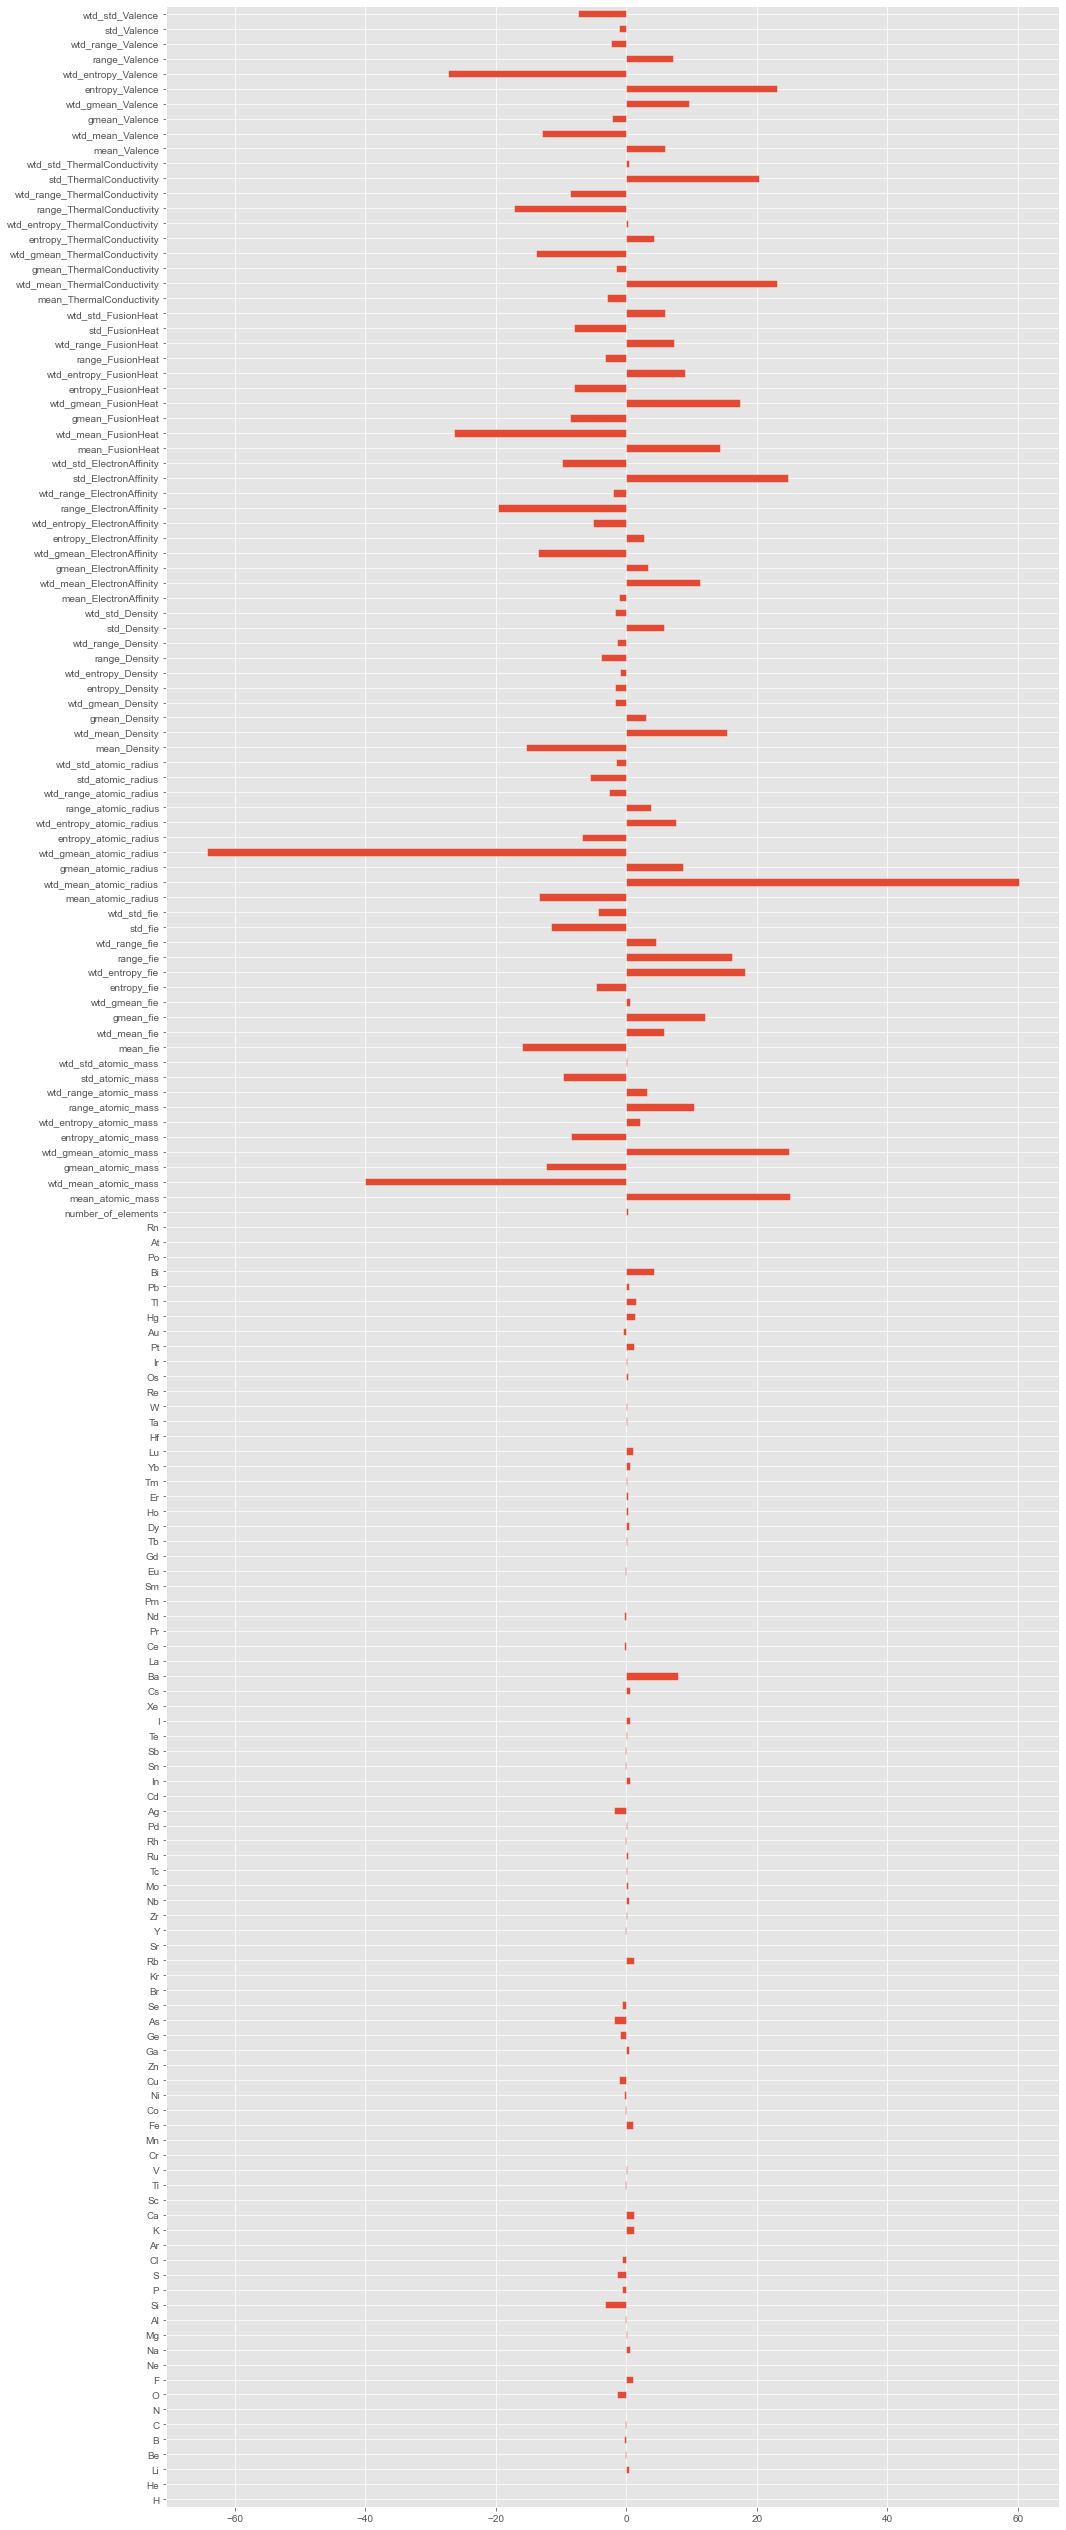

In [134]:
# Check important features
%matplotlib inline
plt.figure(figsize=(16, 46))
plt.style.use('ggplot')

weights = pd.Series(lr.coef_[0], index=x.columns)
weights.plot(kind='barh')  # Use barh instead of bar
plt.show()

In [54]:
top_features = weights.sort_values(ascending=False).head(10)
print(top_features)


wtd_mean_atomic_radius          60.118302
mean_atomic_mass                25.033679
wtd_gmean_atomic_mass           24.979403
std_ElectronAffinity            24.827528
wtd_mean_ThermalConductivity    23.100942
entropy_Valence                 23.095735
std_ThermalConductivity         20.258599
wtd_entropy_fie                 18.257440
wtd_gmean_FusionHeat            17.393710
range_fie                       16.141652
dtype: float64


# ----> cross validation, L1, L2

+ Extra I tried to combine attributes by its type 
Do we need?
    number_of_elements
    **difference** 
    mean_atomic_mass, wtd_mean_atomic_mass, gmean_atomic_mass
    wtd_gmean_atomic_mass
    entropy_atomic_mass, wtd_entropy_atomic_mass
    range_atomic_mass, wtd_range_atomic_mass,
    std_atomic_mass, wtd_std_atomic_mass
    mean_fie, wtd_mean_fie, gmean_fie, wtd_gmean_fie
    entropy_fie, wtd_entropy_fie
    range_fie, wtd_range_fie
    std_fie, wtd_std_fie
    mean_atomic_radius, wtd_mean_atomic_radius, gmean_atomic_radius
    wtd_gmean_atomic_radius, entropy_atomic_radius,wtd_entropy_atomic_radius
    range_atomic_radius, wtd_range_atomic_radius
    std_atomic_radius,wtd_std_atomic_radius
    mean_Density, wtd_mean_Density, gmean_Density
    wtd_gmean_Density
    entropy_Density, wtd_entropy_Density, 
    range_Density, wtd_range_Density
    std_Density,wtd_std_Density
    mean_ElectronAffinity,wtd_mean_ElectronAffinity
    gmean_ElectronAffinity,wtd_gmean_ElectronAffinity
    entropy_ElectronAffinity,wtd_entropy_ElectronAffinity
    range_ElectronAffinity,wtd_range_ElectronAffinity
    std_ElectronAffinity, wtd_std_ElectronAffinity
    mean_FusionHeat, wtd_mean_FusionHeat, gmean_FusionHeat, wtd_gmean_FusionHeat
    entropy_FusionHeat, wtd_entropy_FusionHeat
    range_FusionHeat,wtd_range_FusionHeat
    std_FusionHeat, wtd_std_FusionHeat
    mean_ThermalConductivity, wtd_mean_ThermalConductivity, gmean_ThermalConductivity
    wtd_gmean_ThermalConductivity, entropy_ThermalConductivity
    wtd_entropy_ThermalConductivity
    range_ThermalConductivity, wtd_range_ThermalConductivity, std_ThermalConductivity
    wtd_std_ThermalConductivity
    mean_Valence, wtd_mean_Valence, gmean_Valence,wtd_gmean_Valence
    entropy_Valence, wtd_entropy_Valence, 
    range_Valence, wtd_range_Valence
    std_Valence, wtd_std_Valence
    critical_temp